Firstly, I try to do an algorithm solving for a 2d space with only one solution (1 peak).

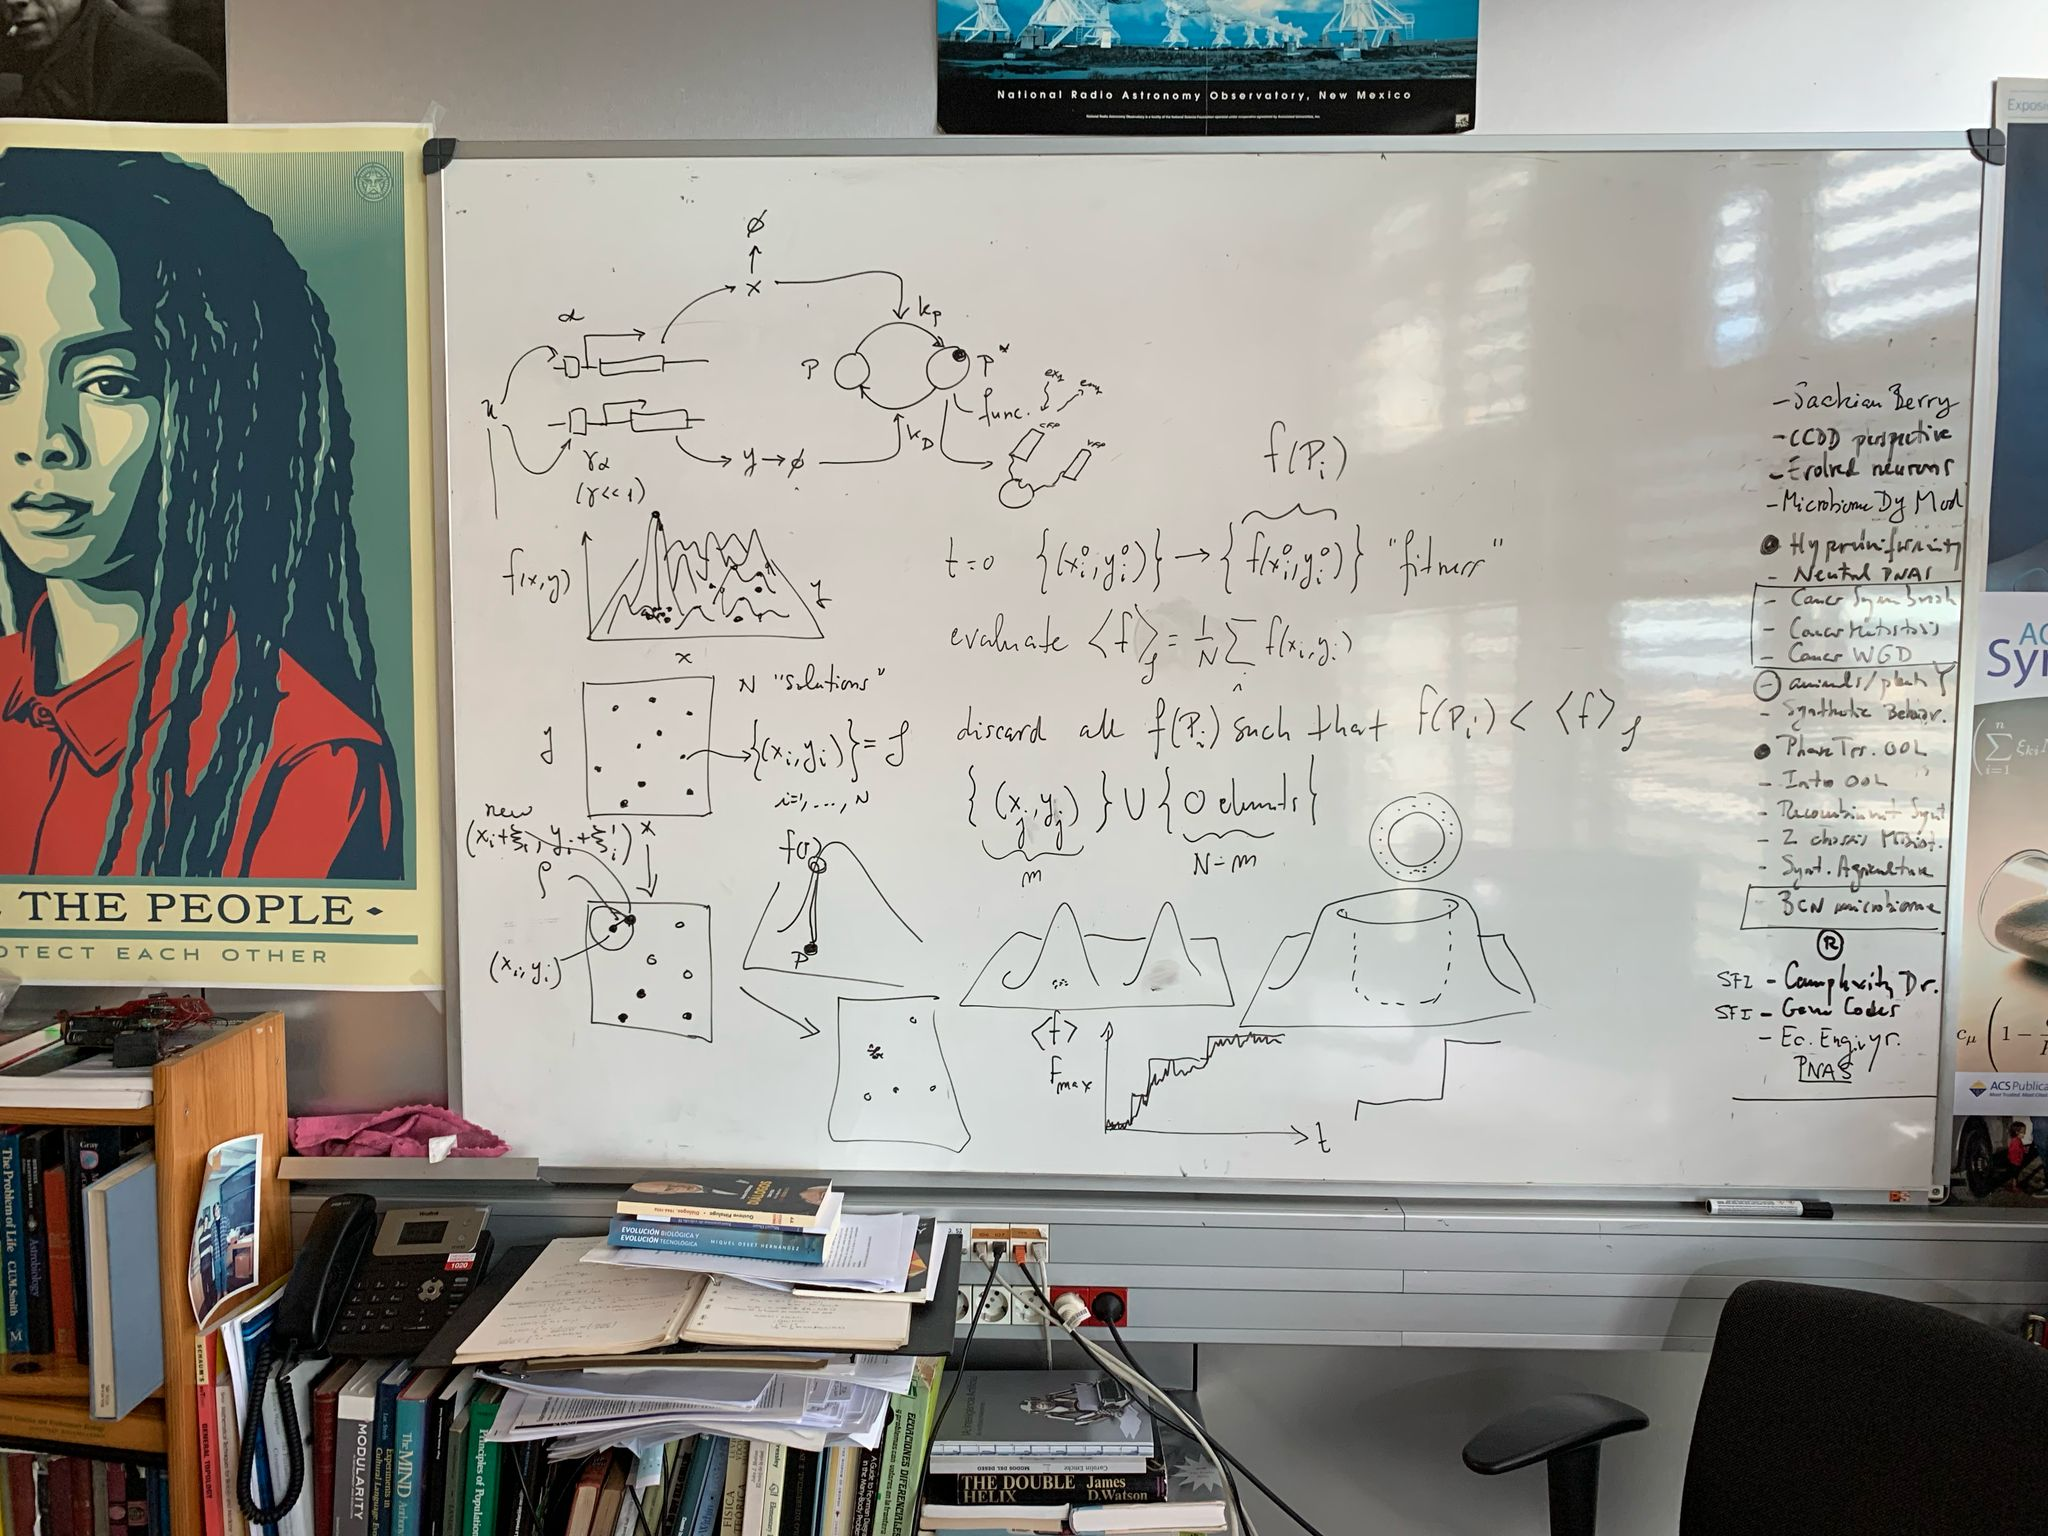

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm   # colormap
from matplotlib.ticker import LinearLocator     # for having ticks evenly spaced on the axis

import evolutionary_programming as ep

In [2]:
par = {'N': 100,
       'coord_range': np.array([0,10]),
       'sol_ratio': 1/5,
       'mutation_ratio': 1/20,
       'seed': 12345,
       'n_iter': 100}

# fitness function
def f(x,y):
    return np.exp(-0.1*(x-3)**2-0.1*(y-3)**2) + np.exp(-0.5*(x-7)**2-0.1*(y-7)**2) # picco fatto con una gaussiana

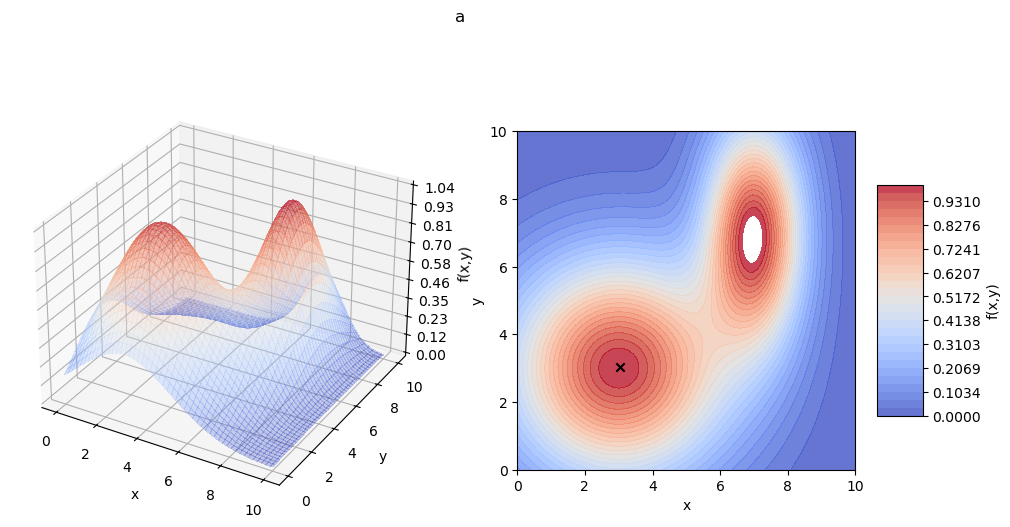

In [3]:
title = 'a'
coord_range = par['coord_range']
N = par['N']
x = np.linspace(coord_range[0],coord_range[1],N)
y = np.linspace(coord_range[0],coord_range[1],N)
X,Y = np.meshgrid(x,y)

fig= plt.figure(figsize=(12,6))
fig.suptitle(title)

# First subplot (3d view)
ax = fig.add_subplot(1,2,1,projection='3d')
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=False,alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_zlim(0.0)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')


# Second subplot (2d view)
ax = fig.add_subplot(1,2,2)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
levels = np.linspace(0,1,30)
contour = ax.contourf(X,Y,f(X,Y),cmap=cm.coolwarm, antialiased=False,levels=levels,alpha=0.8)
ax.scatter(X[np.argmax(f(X,Y)[0]),np.argmax(f(X,Y)[0])],Y[np.argmax(f(X,Y)[0]),np.argmax(f(X,Y)[0])],marker='x',c='black',label='f_max')
# Add a color bar which maps values to colors.
fig.colorbar(contour, shrink=0.5, aspect=5,label='f(x,y)')

plt.show()

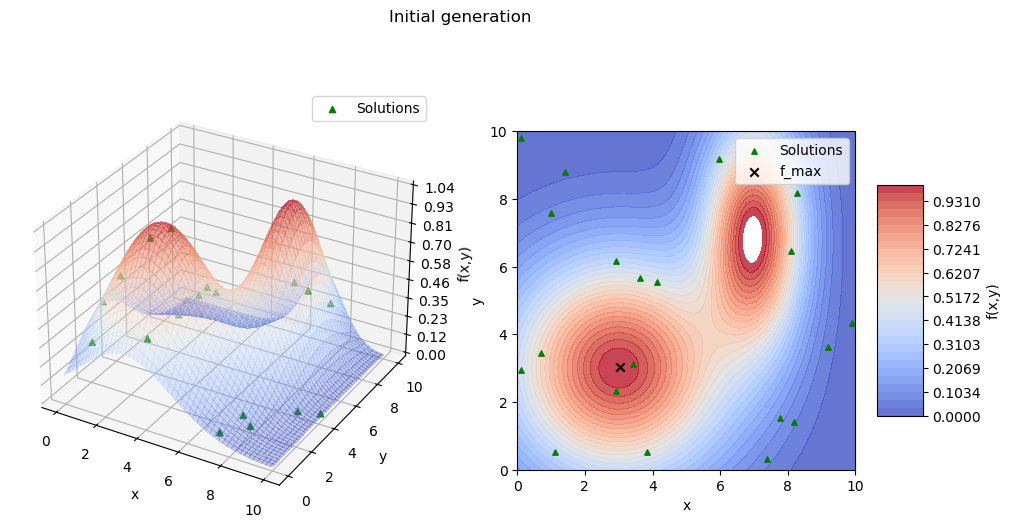

Convergence reached after 99 iterations.


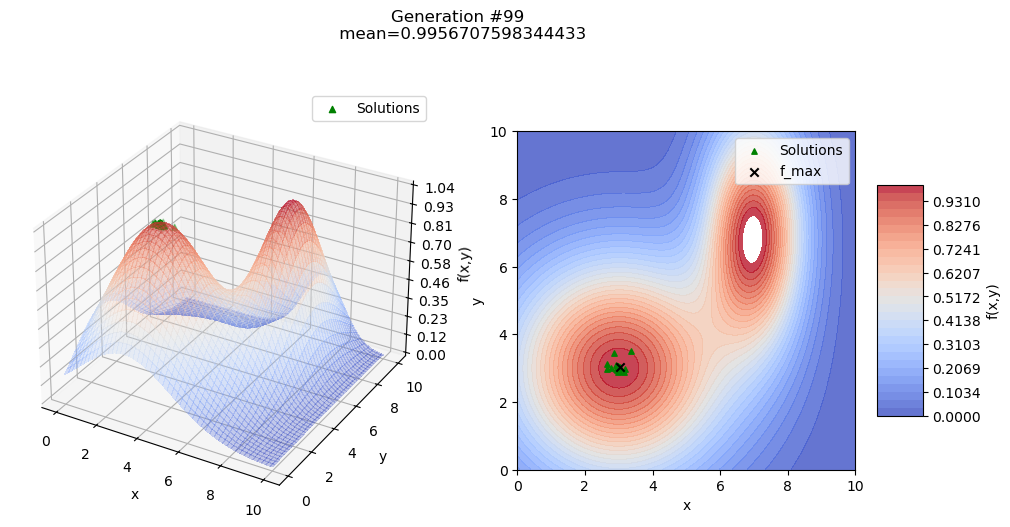

In [4]:
mean_ev, max_ev = ep.ep2d(f,par)

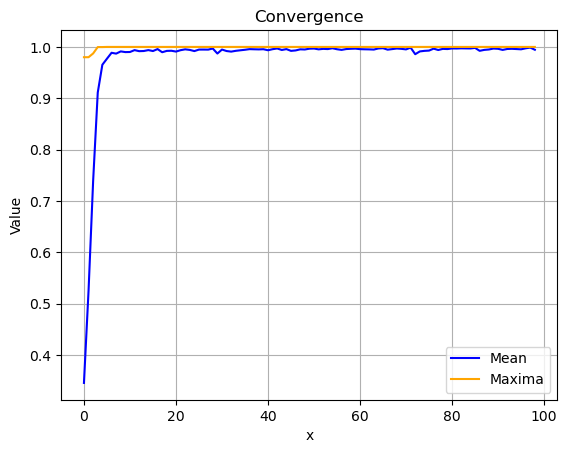

In [5]:
plt.plot(mean_ev,c='b',label='Mean')
plt.plot(max_ev,c='orange',label='Maxima')
plt.legend()
plt.grid(True)
plt.title('Convergence')
plt.ylabel('Value')
plt.xlabel('x')
plt.show()